# **Problem Statement**

A Medical Insurance company needs an automatic system that can predict "what is the medical insurance cost of a person will be?"

In [35]:
#Importing the Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [36]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [37]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

We have data of 1338 people and 7 attributes in the dataset.

In [39]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no missing values and there are 2 attributes which contain categorical data.

Categorical Features,
*   sex
*   Smoker
*   Region

In [40]:
# checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Data Analysis

In [41]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-42-28228e9c3528>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


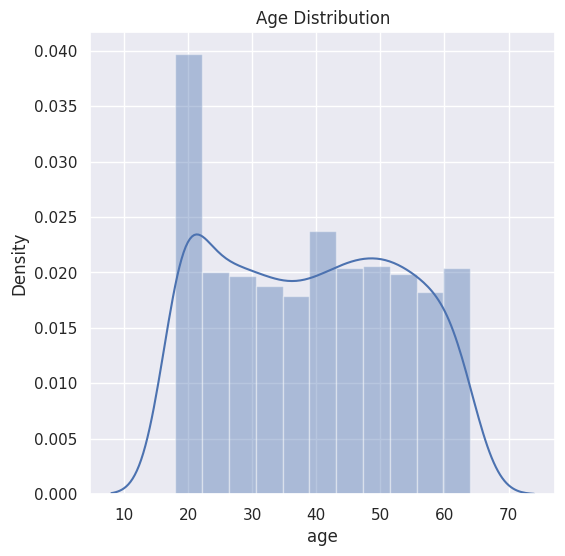

In [42]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

There are more people of age around 20 in the dataset and the rest of the data is mostly normally distributed.

<ipython-input-43-e8829735fcbc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=insurance_dataset, palette='Set2')


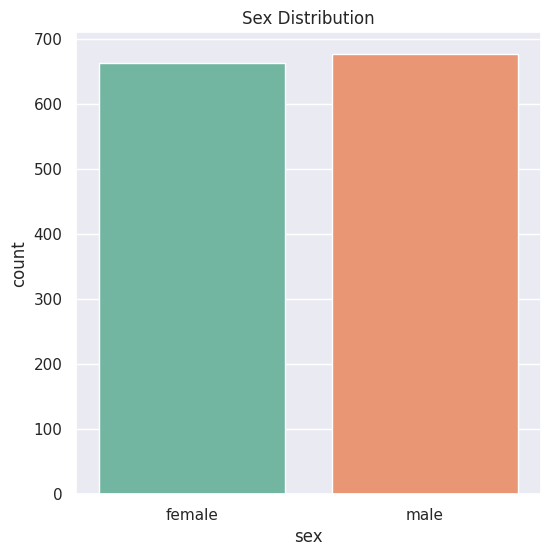

In [43]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset, palette='Set2')
plt.title('Sex Distribution')
plt.show()

<ipython-input-44-81b69896b0d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


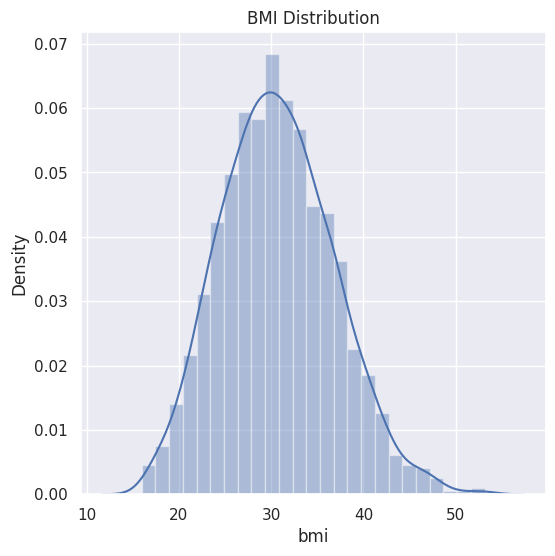

In [44]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

It is a normal distribution.
Normal BMI Range --> 18.6 to 24.9. There are more number of people with bmi around 25 to 40, it implies a lot of people in dataset are overweight and this can effect in the increment of insurance cost.


In [45]:
# children column
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<ipython-input-46-350fbc49fd24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=insurance_dataset, palette='Set2')


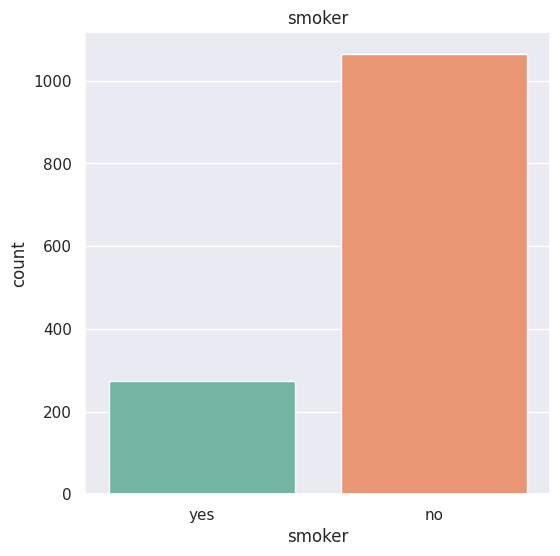

In [46]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset, palette='Set2')
plt.title('smoker')
plt.show()

<ipython-input-47-9865f7ff438a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=insurance_dataset, palette='Set2')


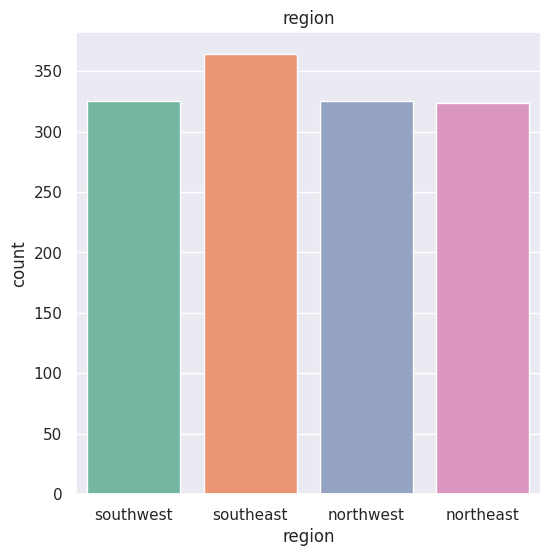

In [47]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset, palette='Set2')
plt.title('region')
plt.show()

<ipython-input-48-a2fe9b394a51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


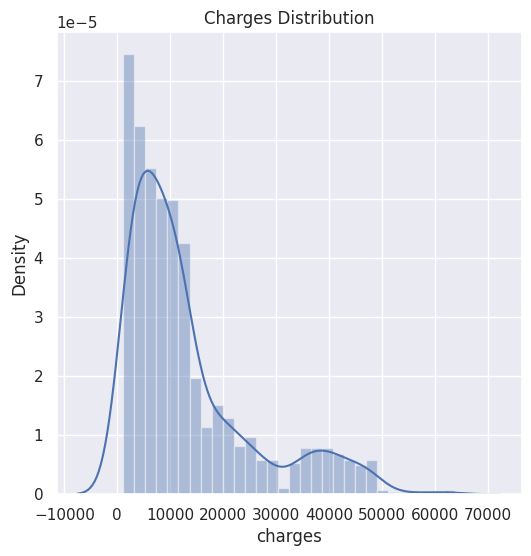

In [48]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing

Encoding the categorical features

In [53]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'region' is a categorical column in insurance_dataset
label_encoder = LabelEncoder()
insurance_dataset['sex_encoded'] = label_encoder.fit_transform(insurance_dataset['sex'])
insurance_dataset['smoker_encoded'] = label_encoder.fit_transform(insurance_dataset['smoker'])
insurance_dataset['region_encoded'] = label_encoder.fit_transform(insurance_dataset['region'])

# Display the encoded column
insurance_dataset[['sex', 'sex_encoded']].head()

,sex,sex_encoded
0,female,0
1,male,1
2,male,1
3,male,1
4,male,1


In [51]:
insurance_dataset[['smoker', 'smoker_encoded']].head()

,smoker,smoker_encoded
0,yes,1
1,no,0
2,no,0
3,no,0
4,no,0


In [52]:
insurance_dataset[['region', 'region_encoded']].head()

,region,region_encoded
0,southwest,3
1,southeast,2
2,southeast,2
3,northwest,1
4,northwest,1


In [54]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [55]:
# Remove columns in place
insurance_dataset.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [56]:
insurance_dataset.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


Splitting the features and target variable.

In [59]:
X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [58]:
print(X)

      age     bmi  children  sex_encoded  smoker_encoded  region_encoded
0      19  27.900         0            0               1               3
1      18  33.770         1            1               0               2
2      28  33.000         3            1               0               2
3      33  22.705         0            1               0               1
4      32  28.880         0            1               0               1
...   ...     ...       ...          ...             ...             ...
1333   50  30.970         3            1               0               1
1334   18  31.920         0            0               0               0
1335   18  36.850         0            0               0               2
1336   21  25.800         0            0               0               3
1337   61  29.070         0            0               1               1

[1338 rows x 6 columns]


In [60]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training data and testing data.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

Linear Regression

In [68]:
# loading the Linear Regression model
regressor = LinearRegression()

In [69]:
regressor.fit(X_train, y_train)

LinearRegression()

Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Model Evaluation

Linear Regression

In [80]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

# prediction on test data
test_data_prediction =regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7519923667088932
R squared vale :  0.7445422986536503


Random Forest

In [81]:
# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Feature Importance
feature_importances = pd.DataFrame(rf_regressor.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Root Mean Squared Error: 4952.174521631177
R-squared: 0.8367032354732826
Feature Importances:
                 importance
smoker_encoded    0.627286
bmi               0.208097
age               0.125794
children          0.019075
region_encoded    0.014073
sex_encoded       0.005675
